In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
from tensorflow.keras.models import load_model

In [19]:
tesla = pd.read_csv('D:/hackindia/datasets/tesla.csv')

In [20]:
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [21]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2193 non-null   float64
 2   High       2193 non-null   float64
 3   Low        2193 non-null   float64
 4   Close      2193 non-null   float64
 5   Adj Close  2193 non-null   float64
 6   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


In [22]:
tesla['Date'] = pd.to_datetime(tesla['Date'])

C:\Users\TUSHAR\AppData\Local\Temp\ipykernel_20388\3702129700.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  tesla['Date'] = pd.to_datetime(tesla['Date'])


In [23]:
print(f'Dataframe contains stock prices between {tesla.Date.min()} {tesla.Date.max()}')
total_days = (tesla.Date.max() - tesla.Date.min()).days
print(f'Total days = {total_days} days')


Dataframe contains stock prices between 2010-06-29 00:00:00 2019-03-15 00:00:00
Total days = 3181 days


In [24]:
tesla.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,2193,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2.193000e+03
mean,2014-11-04 14:37:15.841313024,175.652882,178.710262,172.412075,175.648555,175.648555,5.077449e+06
min,2010-06-29 00:00:00,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,2012-08-29 00:00:00,33.110001,33.910000,32.459999,33.160000,33.160000,1.577800e+06
50%,2014-11-04 00:00:00,204.990005,208.160004,201.669998,204.990005,204.990005,4.171700e+06
75%,2017-01-09 00:00:00,262.000000,265.329987,256.209991,261.739990,261.739990,6.885600e+06
max,2019-03-15 00:00:00,386.690002,389.609985,379.350006,385.000000,385.000000,3.716390e+07
std,NaN,115.580903,117.370092,113.654794,115.580771,115.580771,4.545398e+06


<Axes: >

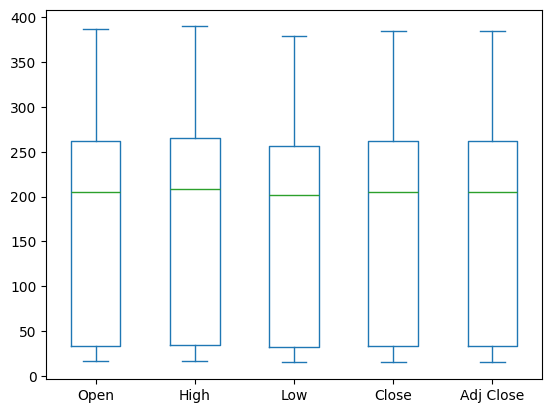

In [25]:
tesla[['Open', 'High','Low','Close','Adj Close',]].plot(kind='box')

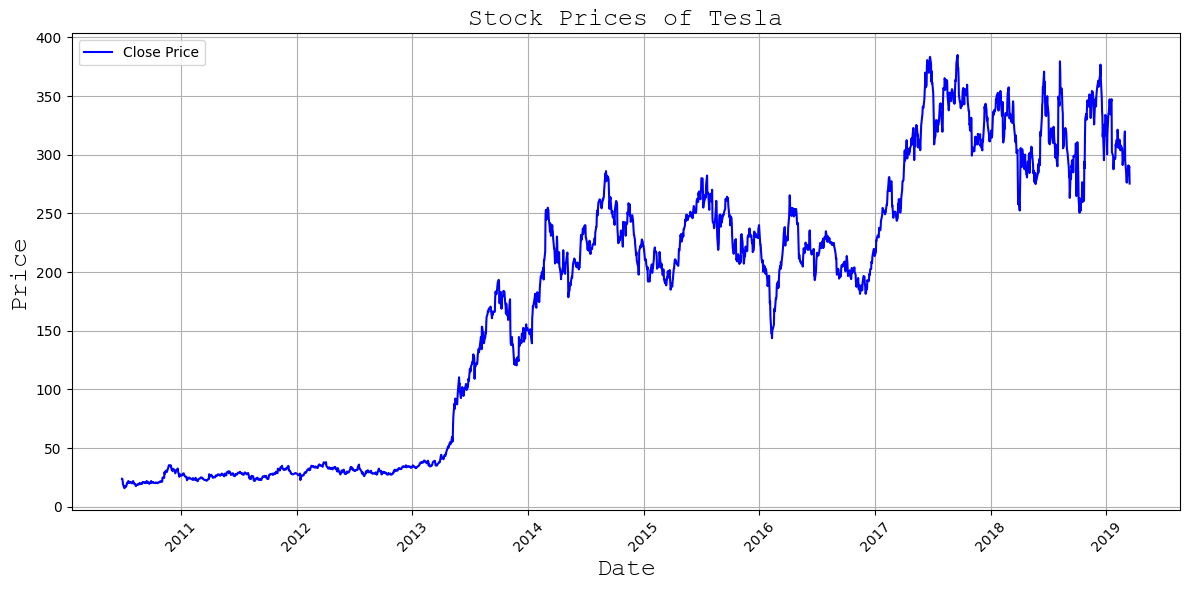

In [26]:
# Assuming `tesla` is a pandas DataFrame with 'Date' and 'Close' columns
tesla['Date'] = pd.to_datetime(tesla['Date'], format='%d-%m-%Y')  # Ensure Date is in datetime format

plt.figure(figsize=(12, 6))
plt.plot(tesla['Date'], tesla['Close'], label='Close Price', color='blue')

plt.title('Stock Prices of Tesla', fontsize=18, family='Courier New')
plt.xlabel('Date', fontsize=18, family='Courier New')
plt.ylabel('Price', fontsize=18, family='Courier New')
plt.grid(True)
plt.legend()

# Rotate x-axis labels if necessary
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


In [27]:
# Building the regression model
from sklearn.model_selection import train_test_split

#For preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#For model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [28]:
#Split the data into train and test sets
X = np.array(tesla.index).reshape(-1,1)
Y = tesla['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [29]:
scaler = StandardScaler().fit(X_train)

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
#Creating a linear model
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

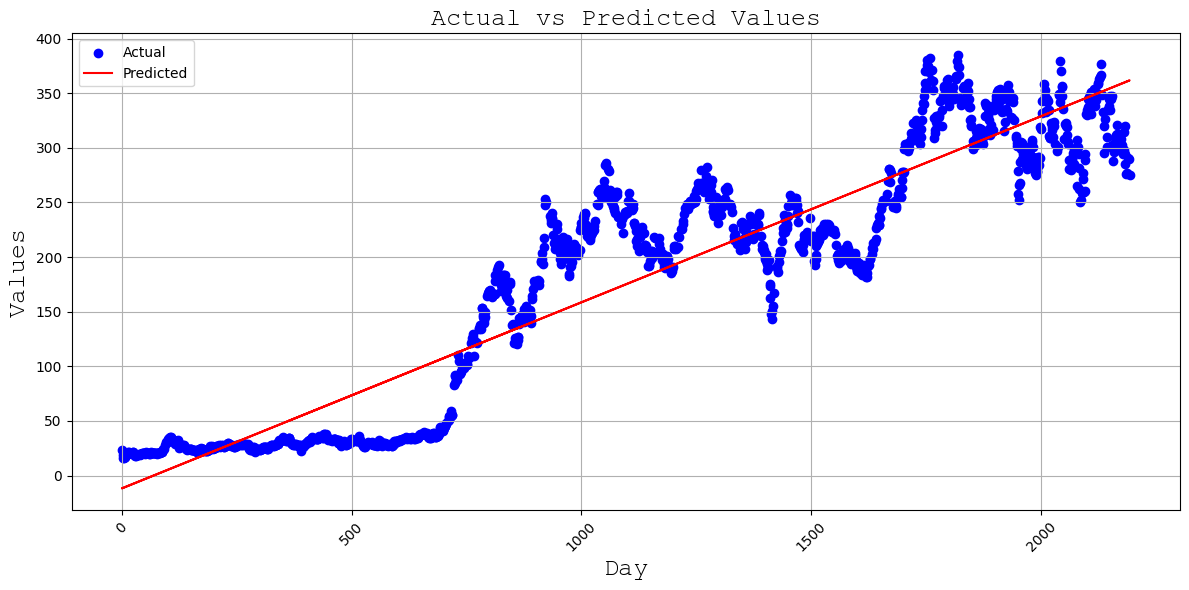

In [32]:

# Convert to numpy arrays if necessary
X_train = np.array(X_train)
Y_train = np.array(Y_train)
predicted = lm.predict(X_train)

# Create the plot
plt.figure(figsize=(12, 6))

# Plot actual values
plt.scatter(X_train[:, 0], Y_train, color='blue', label='Actual', marker='o')

# Plot predicted values
plt.plot(X_train[:, 0], predicted, color='red', label='Predicted')

# Customize the plot
plt.title('Actual vs Predicted Values', fontsize=18, family='Courier New')
plt.xlabel('Day', fontsize=18, family='Courier New')
plt.ylabel('Values', fontsize=18, family='Courier New')
plt.legend()
plt.grid(True)

# Rotate x-axis labels if necessary
plt.xticks(rotation=45)

plt.tight_layout()

In [33]:
#Calculate scores for model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.8658871776828707	0.8610649253244574
MSE       1821.3833862936174	1780.987539418845



NameError: name 'model' is not defined